In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
np.random.seed(666)
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5*x**2 + x + 2 + np.random.normal(0, 1, size=100)

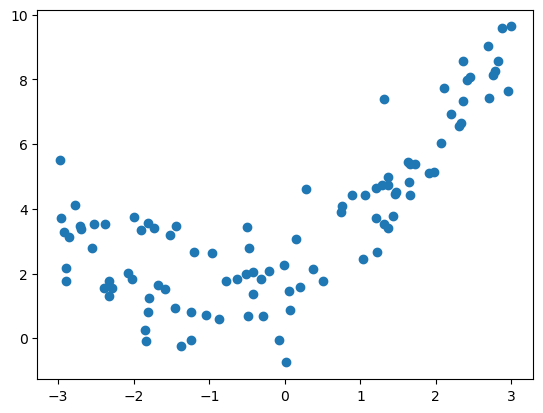

In [3]:
plt.scatter(x, y)

In [4]:
lin_reg = LinearRegression()


In [5]:
lin_reg.fit(X, y)


LinearRegression()

In [6]:
lin_reg.coef_

array([0.95429762])

In [7]:
lin_reg.intercept_

3.6850643259056772

In [8]:
y_predict = lin_reg.predict(X)

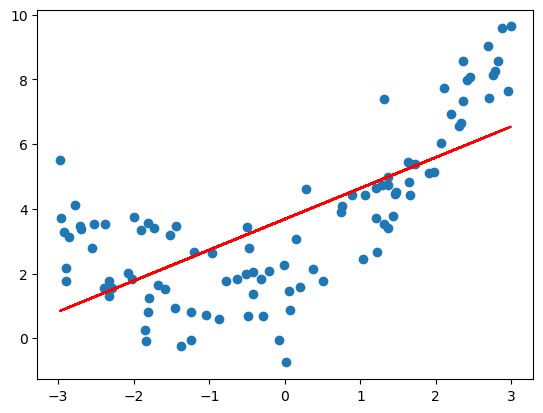

In [9]:
plt.scatter(x, y)
plt.plot(x, y_predict, color='r')

In [10]:
lin_reg.score(X, y)

0.4953707811865009

## 多项式回归


In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)

In [12]:
poly_reg.fit(X, y)

PolynomialFeatures()

In [13]:
X2 = poly_reg.fit_transform(X)

In [14]:
X2[:5]

array([[1.        , 1.20262273, 1.44630143],
       [1.        , 2.06511986, 4.26472002],
       [1.        , 1.05908602, 1.12166319],
       [1.        , 1.36714834, 1.86909459],
       [1.        , 2.70874774, 7.33731434]])

In [15]:
lin2_reg = LinearRegression()

In [16]:
lin2_reg.fit(X2, y)

LinearRegression()

In [17]:
lin2_reg.coef_

array([0.        , 1.00211316, 0.50409402])

In [18]:
lin2_reg.intercept_

2.0153101519246723

In [19]:
y2_predict = lin2_reg.predict(X2)

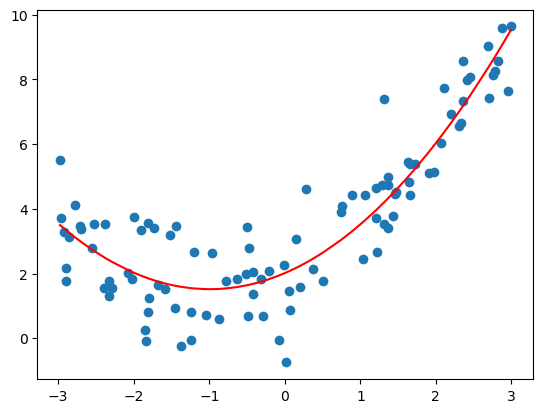

In [20]:
plt.scatter(x, y)
plt.plot(np.array(np.sort(x)), y2_predict[np.argsort(x)], color='r')

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
mean_squared_error(y, y2_predict)

1.0987392142417856

In [23]:
poly10_reg = PolynomialFeatures(degree=10)

In [24]:
poly10_reg.fit(X)

PolynomialFeatures(degree=10)

In [25]:
X10 = poly10_reg.fit_transform(X)

In [26]:
X10.shape

(100, 11)

In [27]:
lin10_reg = LinearRegression()

In [28]:
lin10_reg.fit(X10, y)

LinearRegression()

In [29]:
y10_predict = lin10_reg.predict(X10)

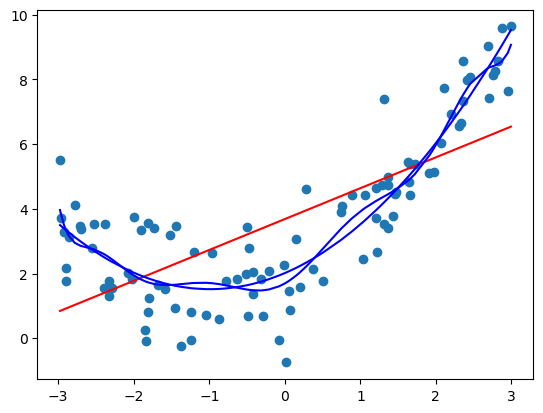

In [30]:
plt.scatter(x, y)
plt.plot(np.array(np.sort(x)), y_predict[np.argsort(x)], color='r')
plt.plot(np.array(np.sort(x)), y2_predict[np.argsort(x)], color='b')
plt.plot(np.array(np.sort(x)), y10_predict[np.argsort(x)], color='b')

In [31]:
mean_squared_error(y, y10_predict)

1.0508466763764124

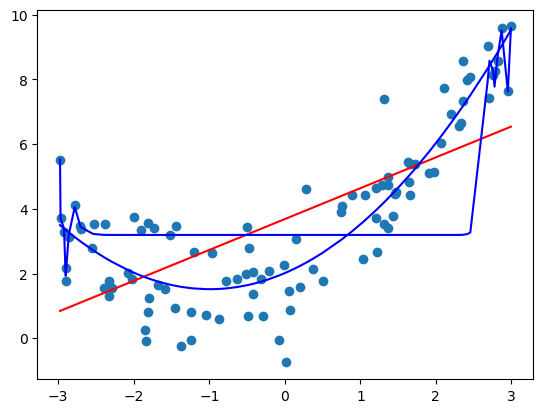

In [42]:
poly100_reg = PolynomialFeatures(degree=100)
poly100_reg.fit(X)
X100 = poly100_reg.fit_transform(X)
lin100_reg = LinearRegression()
lin100_reg.fit(X100, y)
y100_predict = lin100_reg.predict(X100)
plt.scatter(x, y)
plt.plot(np.array(np.sort(x)), y_predict[np.argsort(x)], color='r')
plt.plot(np.array(np.sort(x)), y2_predict[np.argsort(x)], color='b')
plt.plot(np.array(np.sort(x)), y100_predict[np.argsort(x)], color='b')

In [33]:
X100.shape

(100, 101)

In [34]:
lin100_reg.coef_.shape

(101,)

In [36]:
lin100_reg.intercept_

3.194167464641998

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
	return Pipeline([
		("poly", PolynomialFeatures(degree = degree)),
		("std_scaler", StandardScaler()), 
		("lin_reg", LinearRegression())
		])

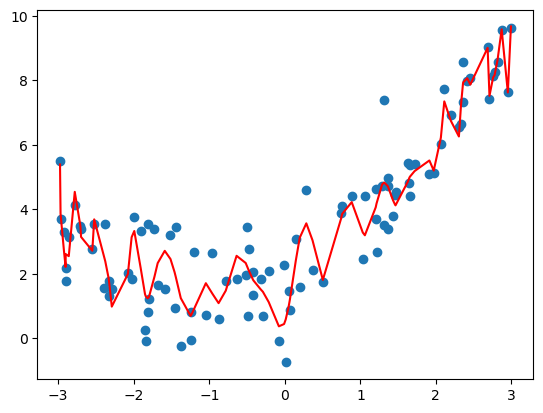

In [39]:
poly_reg100 = PolynomialRegression(100)
poly_reg100.fit(X, y)
y_predict100 = poly_reg100.predict(X)
plt.scatter(x, y)
#plt.plot(np.array(np.sort(x)), y_predict2[np.argsort(x)], color='b')
plt.plot(np.array(np.sort(x)), y_predict100[np.argsort(x)], color='r')

In [40]:
y100_predict[:5]

array([3.19416746, 3.1941678 , 3.19416746, 3.19416746, 8.58065188])

In [41]:
y_predict100[:5]

array([4.06354218, 6.224675  , 3.19733125, 4.69440156, 7.52496797])